### 1. Problem statement  
 - We are tasked by a Fintech firm to analyze mobile app behavior data to identify potential churn customers.   
 - The goal is to predict which users are likely to churn, so the firm can focus on re-engaging these users with better products.
 - Below is focusing on Data Engineering.
 - Production codes will be based on this notebook.

### 2. Importing libraries ####

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

### 3. Read data

In [2]:
df = pd.read_csv('app_churn_data.csv') 

In [3]:
df.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user                     27000 non-null  int64  
 1   churn                    27000 non-null  int64  
 2   age                      26996 non-null  float64
 3   housing                  27000 non-null  object 
 4   credit_score             18969 non-null  float64
 5   deposits                 27000 non-null  int64  
 6   withdrawal               27000 non-null  int64  
 7   purchases_partners       27000 non-null  int64  
 8   purchases                27000 non-null  int64  
 9   cc_taken                 27000 non-null  int64  
 10  cc_recommended           27000 non-null  int64  
 11  cc_disliked              27000 non-null  int64  
 12  cc_liked                 27000 non-null  int64  
 13  cc_application_begin     27000 non-null  int64  
 14  app_downloaded        

### 4. Split data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['user', 'churn'], axis = 1), 
                                                    df['churn'],
                                                   test_size = 0.2,
                                                   random_state = 101)

In [6]:
X_train.shape, y_train.shape

((21600, 29), (21600,))

In [7]:
X_test.shape, y_test.shape

((5400, 29), (5400,))

In [8]:
X_train.head()

,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
1842,41.0,na,NaN,0,0,5,0,0,0,0,...,0,0,0,0,Taurus,0,0,1.0,0.50,0
22027,31.0,na,558.0,5,0,58,5,0,149,0,...,0,0,0,0,Aries,0,0,40.0,1.33,0
7091,21.0,R,NaN,0,0,59,0,0,104,0,...,0,0,0,0,Libra,1,0,39.0,1.30,0
3885,20.0,na,NaN,0,0,5,0,0,18,0,...,0,0,0,0,Libra,0,0,7.0,0.47,1
4148,25.0,R,556.0,3,1,52,3,0,85,0,...,0,0,0,0,Gemini,0,0,28.0,0.93,0


In [9]:
cat_vars = [col for col in X_train.columns if X_train[col].dtypes == 'object' ]
num_vars = [col for col in X_train.columns if X_train[col].dtypes != 'object' ]

In [10]:
cat_vars

['housing', 'payment_type', 'zodiac_sign']

In [11]:
num_vars

['age',
 'credit_score',
 'deposits',
 'withdrawal',
 'purchases_partners',
 'purchases',
 'cc_taken',
 'cc_recommended',
 'cc_disliked',
 'cc_liked',
 'cc_application_begin',
 'app_downloaded',
 'web_user',
 'app_web_user',
 'ios_user',
 'android_user',
 'registered_phones',
 'waiting_4_loan',
 'cancelled_loan',
 'received_loan',
 'rejected_loan',
 'left_for_two_month_plus',
 'left_for_one_month',
 'rewards_earned',
 'reward_rate',
 'is_referred']

In [12]:
features = X_train.columns
features

Index(['age', 'housing', 'credit_score', 'deposits', 'withdrawal',
       'purchases_partners', 'purchases', 'cc_taken', 'cc_recommended',
       'cc_disliked', 'cc_liked', 'cc_application_begin', 'app_downloaded',
       'web_user', 'app_web_user', 'ios_user', 'android_user',
       'registered_phones', 'payment_type', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

### 5. Missing data

### 5.1 missing data for categorical var

In [13]:
cat_na = [col for col in cat_vars if X_train[col].isnull().sum() > 0 or 'na' in X_train[col].values]
cat_na

['housing', 'payment_type', 'zodiac_sign']

In [14]:
df['housing'].unique()

array(['na', 'R', 'O'], dtype=object)

In [15]:
#df['housing_na'] = df['housing'].apply(lambda x: 'missing' if x in ['na', 'NA', np.nan] else x)

 - there are missing values in housing as 'na' 
 - we can leave it for categorical encoding, but below will fill na with 'missing' label

In [16]:
def visualize_cat_na(df, var):
    sns.countplot( x = var, data = df)
    plt.xticks(rotation=20)
    plt.show()

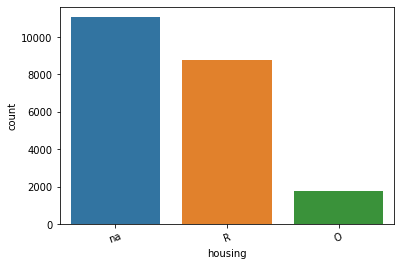

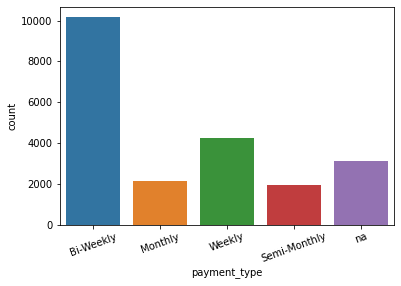

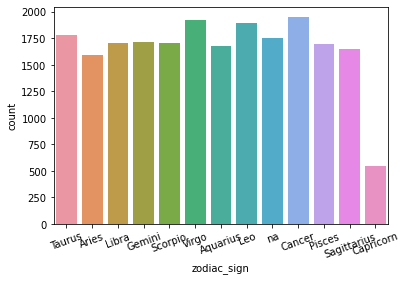

In [17]:
for col in cat_na:
    visualize_cat_na(X_train, col)

- fill na in cat_na with 'missing' label

In [18]:
missing_label = 'na'
cat_imputer = SimpleImputer(missing_values = missing_label, strategy = 'constant', fill_value='missing')
cat_missing_imputer = Pipeline(steps = [('cat_imputer', cat_imputer)])
preprocessor = ColumnTransformer(transformers = [('cat_imputer', cat_missing_imputer, cat_na)],
                                remainder = 'passthrough')
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat_imputer',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                missing_values='na',
                                                                strategy='constant'))]),
                                 ['housing', 'payment_type', 'zodiac_sign'])])

In [19]:
preprocessor.transformers_

[('cat_imputer',
  Pipeline(steps=[('cat_imputer',
                   SimpleImputer(fill_value='missing', missing_values='na',
                                 strategy='constant'))]),
  ['housing', 'payment_type', 'zodiac_sign']),
 ('remainder',
  'passthrough',
  [0,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   19,
   20,
   21,
   22,
   24,
   25,
   26,
   27,
   28])]

In [20]:
remainder_cols = [X_train.columns[index] for index in preprocessor.transformers_[1][-1] ]

In [21]:
X_train_imputed = preprocessor.transform(X_train)
X_test_imputed = preprocessor.transform(X_test)

In [22]:
X_train_imputed = pd.DataFrame(X_train_imputed, 
                               columns = cat_na + remainder_cols)

X_test_imputed = pd.DataFrame(X_test_imputed, 
                              columns = cat_na + remainder_cols)

In [23]:
X_train_imputed[ X_train_imputed['housing'] == 'missing' ].sample(10)

,housing,payment_type,zodiac_sign,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
2441,missing,Monthly,Sagittarius,45,515,0,0,95,0,0,...,2,0,0,0,0,0,0,37,1.23,0
19786,missing,Bi-Weekly,Pisces,22,698,0,0,1,0,0,...,0,0,0,0,0,0,0,NaN,0,0
9221,missing,Monthly,Aquarius,62,NaN,0,0,3,0,0,...,0,0,0,0,0,0,0,NaN,0,0
19077,missing,Bi-Weekly,Pisces,24,NaN,1,1,14,1,0,...,0,0,0,0,0,0,0,10,0.33,1
10741,missing,Bi-Weekly,Gemini,48,700,0,0,17,0,0,...,0,0,0,0,0,0,0,16,0.53,0
2733,missing,Bi-Weekly,Sagittarius,25,NaN,0,0,46,0,0,...,0,0,0,0,0,0,0,39,1.3,1
2316,missing,Monthly,Virgo,24,585,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.03,0
14171,missing,Monthly,Scorpio,33,660,0,0,2,0,0,...,0,0,0,0,0,0,0,NaN,0,0
17500,missing,Bi-Weekly,Cancer,36,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,0,0
7502,missing,missing,Scorpio,29,605,25,1,60,25,0,...,0,0,0,0,0,0,0,24,0,1


### 5.2 missing data for numerical var

In [24]:
num_na = [col for col in num_vars if X_train_imputed[col].isnull().sum() > 0]
num_na

['age', 'credit_score', 'rewards_earned']

In [25]:
df[num_na].isna().sum()

age                  4
credit_score      8031
rewards_earned    3227
dtype: int64

In [26]:
df[num_na].isna().mean()

age               0.000148
credit_score      0.297444
rewards_earned    0.119519
dtype: float64

#### 5.2.1 analyse missing data for age column

 - missing records are all None in each col when age col is na except payment_type. 
 - so use drop them all - **complete case analysis (CCA)**

In [27]:
X_train[X_train['age'].isnull()]['payment_type']

3237     Semi-Monthly
15722       Bi-Weekly
12571       Bi-Weekly
Name: payment_type, dtype: object

In [28]:
X_train_imputed[X_train_imputed['age'].isnull()]

,housing,payment_type,zodiac_sign,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
2129,missing,Semi-Monthly,missing,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,0,0
5889,missing,Bi-Weekly,missing,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,0,1
14727,missing,Bi-Weekly,missing,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,0,1


In [29]:
X_test_imputed[X_test_imputed['age'].isnull()]

,housing,payment_type,zodiac_sign,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
2617,missing,Bi-Weekly,missing,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,0,0


 - drop missing values on rows with <1 non NA value based on age column
 - **bleow should also apply to target, this goes to data_management before pipeline**

In [30]:
X_train_imputed.reset_index(drop = True, inplace = True)
X_test_imputed.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

In [31]:
train_col_missing_index = X_train_imputed[ X_train_imputed['age'].isnull() ].index
test_col_missing_index = X_test_imputed[ X_test_imputed['age'].isnull() ].index

In [32]:
X_train_imputed = X_train_imputed.dropna(axis = 0, how = 'any', thresh = 1, subset = ['age'])
X_test_imputed = X_test_imputed.dropna(axis = 0, how = 'any', thresh = 1, subset = ['age'])

In [33]:
y_train.drop(axis = 0, index = train_col_missing_index, inplace = True)
y_test.drop(axis = 0, index = test_col_missing_index, inplace = True)

In [34]:
X_train_imputed.shape, X_test_imputed.shape

((21597, 29), (5399, 29))

In [35]:
y_train.shape, y_test.shape

((21597,), (5399,))

#### 5.2.2 analyse missing data for credit_score column

In [36]:
df['credit_score'].isnull().mean(), df['credit_score'].isnull().sum()

(0.29744444444444446, 8031)

In [37]:
def visualize_num_na(df_temp, var):
    sns.distplot(df_temp[var], bins = 30)
    plt.show()
    sns.boxplot(y = df_temp[var])
    plt.show()

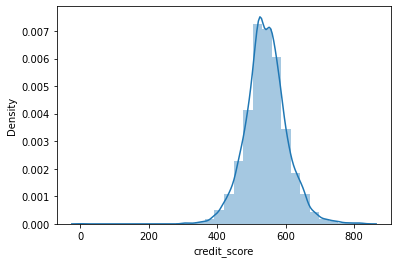

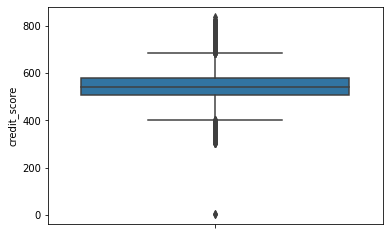

In [38]:
visualize_num_na(X_train_imputed, 'credit_score')

#### credit_score follows a normal distribution, so imputte NA:
 - replace NA with mean
 - add a binary col to indicate missing  

#### Concerns:  
 - distribution distorted 
 - more outliers

In [39]:
num_var_mean = ['credit_score']
num_var_mean_indicator = ['credit_score_na']
num_mean_imputer = Pipeline(steps = [('imputer', SimpleImputer(strategy = 'mean', add_indicator=True))])
preprocessor = ColumnTransformer(transformers = [('mean_imputer', num_mean_imputer, num_var_mean)],
                                remainder = 'passthrough')

In [40]:
preprocessor.fit(X_train_imputed)

ColumnTransformer(remainder='passthrough',
                  transformers=[('mean_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(add_indicator=True))]),
                                 ['credit_score'])])

In [41]:
preprocessor.transformers_

[('mean_imputer',
  Pipeline(steps=[('imputer', SimpleImputer(add_indicator=True))]),
  ['credit_score']),
 ('remainder',
  'passthrough',
  [0,
   1,
   2,
   3,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28])]

In [42]:
preprocessor.named_transformers_['mean_imputer']

Pipeline(steps=[('imputer', SimpleImputer(add_indicator=True))])

In [43]:
preprocessor.named_transformers_['mean_imputer'].named_steps['imputer'].statistics_

array([543.15031384])

 - 'remainder', 'passthrough', [0,1,3...28]
 - the code above tells us that the remainder columns are those in position [0,1,3...28] of the X_train

In [44]:
remainder_cols = [X_train_imputed.columns[index] for index in preprocessor.transformers_[1][-1] ]

In [45]:
type(X_train_imputed)

pandas.core.frame.DataFrame

In [46]:
X_train_imputed_num = preprocessor.transform(X_train_imputed)
X_test_imputed_num = preprocessor.transform(X_test_imputed)

In [47]:
X_train_imputed_num = pd.DataFrame(X_train_imputed_num, 
                               columns = num_var_mean + num_var_mean_indicator + remainder_cols)
X_test_imputed_num = pd.DataFrame(X_test_imputed_num, 
                              columns = num_var_mean + num_var_mean_indicator + remainder_cols)

In [48]:
X_train_imputed.shape, X_test_imputed.shape

((21597, 29), (5399, 29))

In [49]:
X_train_imputed_num.head()

,credit_score,credit_score_na,housing,payment_type,zodiac_sign,age,deposits,withdrawal,purchases_partners,purchases,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,543.15,1,missing,Bi-Weekly,Taurus,41,0,0,5,0,...,0,0,0,0,0,0,0,1,0.5,0
1,558,0,missing,Bi-Weekly,Aries,31,5,0,58,5,...,0,0,0,0,0,0,0,40,1.33,0
2,543.15,1,R,Monthly,Libra,21,0,0,59,0,...,0,0,0,0,0,1,0,39,1.3,0
3,543.15,1,missing,Weekly,Libra,20,0,0,5,0,...,0,0,0,0,0,0,0,7,0.47,1
4,556,0,R,Bi-Weekly,Gemini,25,3,1,52,3,...,0,0,0,0,0,0,0,28,0.93,0


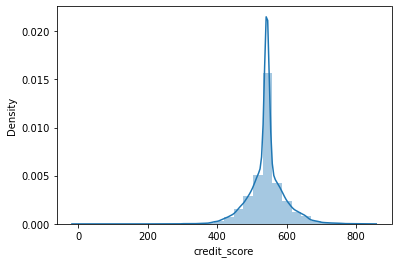

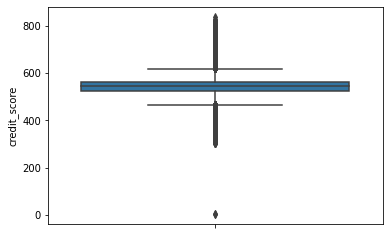

In [50]:
visualize_num_na(X_train_imputed_num, 'credit_score')

#### 5.2.3 analyse missing data for rewards_earned column

#### rewards_earned follows a skewed distribution, so imputte NA:
 - replace NA with median
 - add a binary col to indicate missing
 - distribution distorted 
 - more outliers

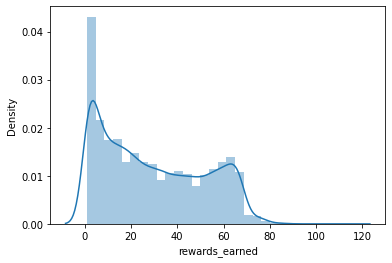

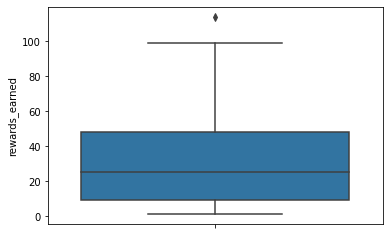

In [51]:
visualize_num_na(X_train_imputed_num, 'rewards_earned')

In [52]:
num_var_median = ['rewards_earned']
num_var_median_indicator = ['rewards_earned_na']
num_median_imputer = Pipeline(steps = [('imputer', SimpleImputer(strategy = 'median', add_indicator=True))])
preprocessor = ColumnTransformer(transformers = [('median_imputer', num_median_imputer, num_var_median)],
                                remainder = 'passthrough')

In [53]:
preprocessor.fit(X_train_imputed_num)

ColumnTransformer(remainder='passthrough',
                  transformers=[('median_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(add_indicator=True,
                                                                strategy='median'))]),
                                 ['rewards_earned'])])

In [54]:
preprocessor.transformers_

[('median_imputer',
  Pipeline(steps=[('imputer',
                   SimpleImputer(add_indicator=True, strategy='median'))]),
  ['rewards_earned']),
 ('remainder',
  'passthrough',
  [0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   28,
   29])]

In [55]:
remainder_cols = [X_train_imputed_num.columns[index] for index in preprocessor.transformers_[1][-1] ]

In [56]:
X_train_imputed.shape, X_test_imputed.shape

((21597, 29), (5399, 29))

In [57]:
X_train_imputed_num.shape, X_test_imputed_num.shape

((21597, 30), (5399, 30))

In [58]:
X_train_imputed_num_2nd = preprocessor.transform(X_train_imputed_num)
X_test_imputed_num_2nd = preprocessor.transform(X_test_imputed_num)

In [59]:
X_train_imputed_num_2nd.shape, X_test_imputed_num_2nd.shape

((21597, 31), (5399, 31))

In [60]:
X_train_imputed_num_2nd = pd.DataFrame(X_train_imputed_num_2nd, 
                                   columns = num_var_median + num_var_median_indicator + remainder_cols)
X_test_imputed_num_2nd = pd.DataFrame(X_test_imputed_num_2nd, 
                                  columns = num_var_median + num_var_median_indicator + remainder_cols)

In [61]:
X_train_imputed_num_2nd.shape, X_test_imputed_num_2nd.shape

((21597, 31), (5399, 31))

In [62]:
X_test_imputed_num_2nd.head()

,rewards_earned,rewards_earned_na,credit_score,credit_score_na,housing,payment_type,zodiac_sign,age,deposits,withdrawal,...,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,25,1,543.15,1,missing,Weekly,Virgo,22,1,0,...,0,0,0,0,0,0,0,0,0,0
1,52,0,543.15,1,missing,Bi-Weekly,Gemini,43,0,0,...,0,0,0,0,0,0,0,0,1.73,0
2,42,0,543.15,1,missing,missing,Virgo,26,0,0,...,1,0,0,0,0,0,0,1,1.4,0
3,4,0,564,0,missing,Bi-Weekly,missing,26,1,0,...,1,2,0,0,0,0,0,0,0.13,0
4,8,0,520,0,missing,missing,Sagittarius,38,1,1,...,1,0,0,0,0,0,0,0,2.67,0


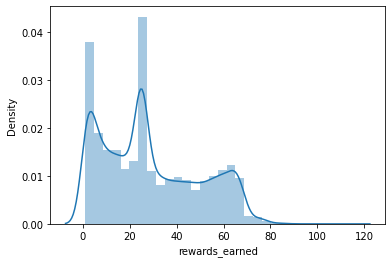

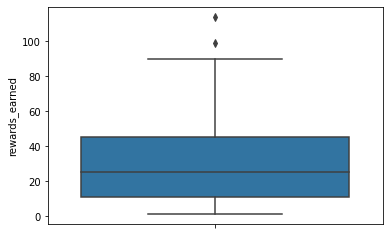

In [63]:
visualize_num_na(X_train_imputed_num_2nd, 'rewards_earned')

In [64]:
X_train_imputed_num_2nd.shape, X_test_imputed_num_2nd.shape

((21597, 31), (5399, 31))

### 6. Categorical encoding

In [65]:
X_train_imputed_num_2nd.head(3)

,rewards_earned,rewards_earned_na,credit_score,credit_score_na,housing,payment_type,zodiac_sign,age,deposits,withdrawal,...,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,1,0,543.15,1,missing,Bi-Weekly,Taurus,41,0,0,...,0,0,0,0,0,0,0,0,0.5,0
1,40,0,558,0,missing,Bi-Weekly,Aries,31,5,0,...,1,0,0,0,0,0,0,0,1.33,0
2,39,0,543.15,1,R,Monthly,Libra,21,0,0,...,1,0,0,0,0,0,1,0,1.3,0


In [66]:
cat_vars

['housing', 'payment_type', 'zodiac_sign']

#### 6.1 housing

In [67]:
X_train_imputed_num_2nd['housing'].value_counts()

missing    11065
R           8785
O           1747
Name: housing, dtype: int64

<AxesSubplot:>

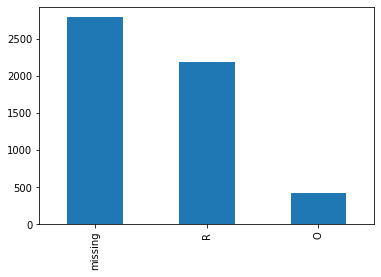

In [68]:
X_test_imputed_num_2nd['housing'].value_counts().plot.bar()

#### 6.2 payment-type

In [69]:
X_train_imputed_num_2nd['payment_type'].value_counts()

Bi-Weekly       10150
Weekly           4266
missing          3129
Monthly          2124
Semi-Monthly     1928
Name: payment_type, dtype: int64

<AxesSubplot:>

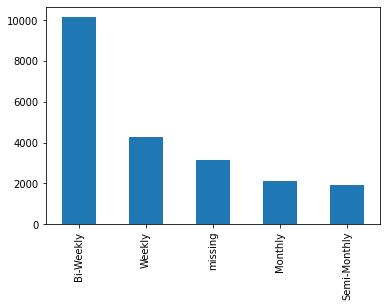

In [70]:
X_train_imputed_num_2nd['payment_type'].value_counts().plot.bar()

#### 6.3 zodiac_sign

In [71]:
X_train_imputed_num_2nd['zodiac_sign'].value_counts()

Cancer         1952
Virgo          1925
Leo            1893
Taurus         1784
missing        1754
Gemini         1712
Libra          1709
Scorpio        1702
Pisces         1695
Aquarius       1678
Sagittarius    1650
Aries          1592
Capricorn       551
Name: zodiac_sign, dtype: int64

<AxesSubplot:>

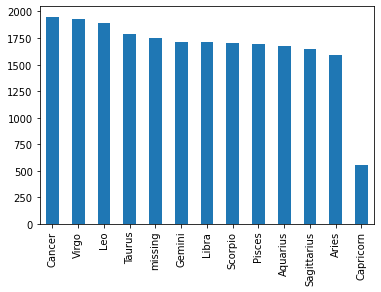

In [72]:
X_train_imputed_num_2nd['zodiac_sign'].value_counts().plot.bar()

#### conclusion
- each categorical var is evenly distributed 
- no rare labels 
- no predominat labels
- no huge caridality
- use **One hot encoding**

In [73]:
encoder = OneHotEncoder(categories = 'auto',
                       drop = 'first',
                       sparse = False,
                       handle_unknown = 'error')
encoder.fit(X_train_imputed_num_2nd[cat_vars])


OneHotEncoder(drop='first', sparse=False)

In [74]:
encoder.categories_

[array(['O', 'R', 'missing'], dtype=object),
 array(['Bi-Weekly', 'Monthly', 'Semi-Monthly', 'Weekly', 'missing'],
       dtype=object),
 array(['Aquarius', 'Aries', 'Cancer', 'Capricorn', 'Gemini', 'Leo',
        'Libra', 'Pisces', 'Sagittarius', 'Scorpio', 'Taurus', 'Virgo',
        'missing'], dtype=object)]

In [75]:
tmp_train = encoder.transform(X_train_imputed_num_2nd[cat_vars])
tmp_test = encoder.transform(X_test_imputed_num_2nd[cat_vars])

In [76]:
cat_train_encoded = pd.DataFrame(tmp_train)
cat_train_encoded.columns = encoder.get_feature_names()

cat_test_encoded = pd.DataFrame(tmp_test)
cat_test_encoded.columns = encoder.get_feature_names()

In [77]:
cat_train_encoded.head()

,x0_R,x0_missing,x1_Monthly,x1_Semi-Monthly,x1_Weekly,x1_missing,x2_Aries,x2_Cancer,x2_Capricorn,x2_Gemini,x2_Leo,x2_Libra,x2_Pisces,x2_Sagittarius,x2_Scorpio,x2_Taurus,x2_Virgo,x2_missing
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
X_train_imputed_num_2nd_encoded = pd.concat([X_train_imputed_num_2nd.drop(cat_vars, axis =1), cat_train_encoded], 
                                        axis = 1)

X_test_imputed_num_2nd_encoded = pd.concat([X_test_imputed_num_2nd.drop(cat_vars, axis =1), cat_test_encoded], 
                                        axis = 1)

In [79]:
X_train_imputed_num_2nd_encoded.head(3)

,rewards_earned,rewards_earned_na,credit_score,credit_score_na,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,x2_Capricorn,x2_Gemini,x2_Leo,x2_Libra,x2_Pisces,x2_Sagittarius,x2_Scorpio,x2_Taurus,x2_Virgo,x2_missing
0,1,0,543.15,1,41,0,0,5,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,40,0,558,0,31,5,0,58,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,39,0,543.15,1,21,0,0,59,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
X_test_imputed_num_2nd_encoded.head(3)

,rewards_earned,rewards_earned_na,credit_score,credit_score_na,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,x2_Capricorn,x2_Gemini,x2_Leo,x2_Libra,x2_Pisces,x2_Sagittarius,x2_Scorpio,x2_Taurus,x2_Virgo,x2_missing
0,25,1,543.15,1,22,1,0,4,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,52,0,543.15,1,43,0,0,0,0,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,42,0,543.15,1,26,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### 7. Numerical scaling

In [81]:
sc_X = StandardScaler()
sc_X.fit(X_train_imputed_num_2nd_encoded[num_vars])

StandardScaler()

In [82]:
num_vars_train_scaled = pd.DataFrame(sc_X.transform(X_train_imputed_num_2nd_encoded[num_vars]))

num_vars_test_scaled = pd.DataFrame(sc_X.transform(X_test_imputed_num_2nd_encoded[num_vars]))

In [83]:
num_vars_train_scaled.columns = num_vars
num_vars_test_scaled.columns = num_vars

num_vars_train_scaled.index = X_train_imputed_num_2nd_encoded[num_vars].index.values
num_vars_test_scaled.index = X_test_imputed_num_2nd_encoded[num_vars].index.values


In [84]:
X_train.head(3)

,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
1842,41.0,na,NaN,0,0,5,0,0,0,0,...,0,0,0,0,Taurus,0,0,1.0,0.50,0
22027,31.0,na,558.0,5,0,58,5,0,149,0,...,0,0,0,0,Aries,0,0,40.0,1.33,0
7091,21.0,R,NaN,0,0,59,0,0,104,0,...,0,0,0,0,Libra,1,0,39.0,1.30,0


In [85]:
X_train2 = pd.concat([X_train_imputed_num_2nd_encoded.drop(num_vars, axis =1), num_vars_train_scaled], 
                                        axis = 1)

X_test2 = pd.concat([X_test_imputed_num_2nd_encoded.drop(num_vars, axis =1), num_vars_test_scaled], 
                                        axis = 1)

In [86]:
X_train2.head(3)

,rewards_earned_na,credit_score_na,x0_R,x0_missing,x1_Monthly,x1_Semi-Monthly,x1_Weekly,x1_missing,x2_Aries,x2_Cancer,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.462443,-0.033354,-0.137894,-0.135433,-0.067169,-0.457056,-0.13702,-1.339927,-0.543439,-0.681179
1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.462443,-0.033354,-0.137894,-0.135433,-0.067169,-0.457056,-0.13702,0.545440,0.559972,-0.681179
2,0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.462443,-0.033354,-0.137894,-0.135433,-0.067169,2.187916,-0.13702,0.497097,0.520090,-0.681179


In [87]:
X_train2.shape, y_train.shape

((21597, 46), (21597,))

In [88]:
X_test2.shape, y_test.shape

((5399, 46), (5399,))

#### Data is now ready for model